In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("titanic.csv")

In [5]:
numeric_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] #= df.select_dtypes(include=['int64', 'float64']).columns
df.groupby('Survived')[numeric_columns].mean()

# df.groupby('Survivied')[].mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [6]:
df.groupby('Survived').agg({
    'Embarked': 'count',
    'Sex': 'count',
})

,Embarked,Sex
Survived,,
0,549,549
1,340,342


# Graphs For Analizing

<Axes: xlabel='Sex'>

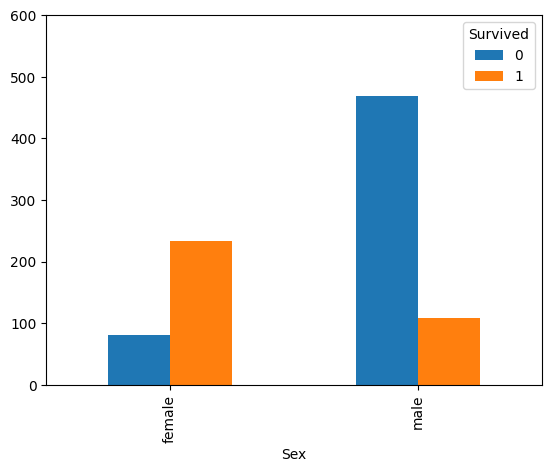

In [12]:
pd.crosstab(df['Sex'], df['Survived']).plot(kind = 'bar', ylim = (0, 600))

<Axes: xlabel='Embarked'>

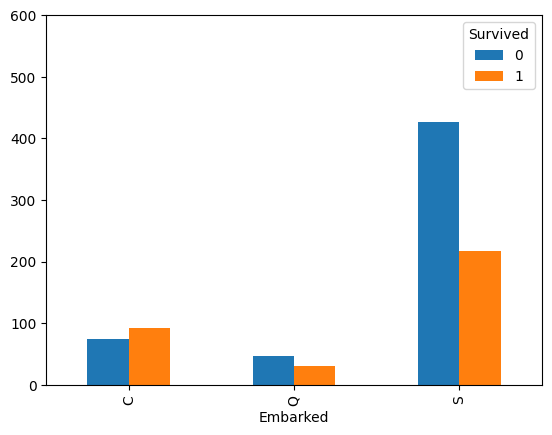

In [13]:
pd.crosstab(df['Embarked'], df['Survived']).plot(kind = 'bar', ylim = (0, 600))

In [38]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

# Observation
1. P-Class: 3 > 2 > 1
2. Sex: Female > Male
4. Fare: 48 > 22
5. Parch: 0.46 > 0.32

In [44]:
dummy_sex = pd.get_dummies(df['Sex'])

mod_df = df.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Ticket', 'Fare', 'Cabin', 'Sex', 'Embarked'], axis = 'columns')
mod_df = pd.concat([mod_df, dummy_sex], axis = 'columns')
X = mod_df.drop(['male'], axis = 'columns')
y = df['Survived']
X.head()

,Pclass,Age,Parch,female
0,3,22.0,0,False
1,1,38.0,0,True
2,3,26.0,0,True
3,1,35.0,0,True
4,3,35.0,0,False


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [50]:
reg = DecisionTreeClassifier()
reg.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
reg.score(X_test, y_test)

0.8324022346368715

In [53]:
reg.predict([[3, 20, 0, 0]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])